# Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.shape

(569, 33)

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Processing

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
df.drop([
    'id',
    'Unnamed: 32'
], axis = 1, inplace = True)

In [7]:
df.shape

(569, 31)

In [8]:
x = df.drop(['diagnosis'], axis = 1)

In [9]:
y = df['diagnosis']

In [10]:
x.shape

(569, 30)

In [11]:
y.shape

(569,)

In [12]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<BarContainer object of 2 artists>

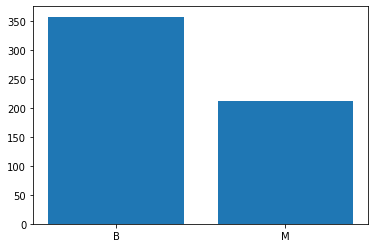

In [13]:
plt.bar(y.value_counts().keys(), y.value_counts().values)

In [14]:
y = pd.get_dummies(y)['B']

In [15]:
scaler = StandardScaler()

In [16]:
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [17]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# Training

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [19]:
models = [
    KNeighborsClassifier(i + 1)
    for i in range(10)
]

In [20]:
for model in models:
    model.fit(x_train, y_train)

# Testing

In [22]:
for i in range(len(models)):
    model = models[i]
    print(f"N = {i + 1}")
    print(f"Train Accuracy: {accuracy_score(y_train, model.predict(x_train))}")
    print(f"Test Accuracy: {accuracy_score(y_test, model.predict(x_test))}")
    print()

N = 1
Train Accuracy: 1.0
Test Accuracy: 0.9649122807017544

N = 2
Train Accuracy: 0.9758241758241758
Test Accuracy: 0.9473684210526315

N = 3
Train Accuracy: 0.978021978021978
Test Accuracy: 0.956140350877193

N = 4
Train Accuracy: 0.9802197802197802
Test Accuracy: 0.956140350877193

N = 5
Train Accuracy: 0.978021978021978
Test Accuracy: 0.9649122807017544

N = 6
Train Accuracy: 0.9758241758241758
Test Accuracy: 0.9736842105263158

N = 7
Train Accuracy: 0.9714285714285714
Test Accuracy: 0.9649122807017544

N = 8
Train Accuracy: 0.967032967032967
Test Accuracy: 0.9649122807017544

N = 9
Train Accuracy: 0.9714285714285714
Test Accuracy: 0.9649122807017544

N = 10
Train Accuracy: 0.9714285714285714
Test Accuracy: 0.9649122807017544

